# Importando Bases de Datos

In [76]:
import pandas as pd

In [77]:
#Cargamos los datos
datos= pd.read_csv('credit_card.csv')
datos.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [78]:
#Identificamoes que tipo de datos tenemos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


El conjunto de datos descrito contiene información sobre 1500 registros de clientes, cada uno con 8 variables que incluyen tanto atributos numéricos como categóricos. Las columnas numéricas incluyen el límite de crédito (`LIMIT_BAL`), la edad (`AGE`), el monto de la factura (`BILL_AMT`), el monto pagado (`PAY_AMT`) y el estado de incumplimiento (`DEFAULT`), que es la variable objetivo para un análisis predictivo, donde el valor 1 indica que el cliente incumplió un pago y 0 significa que no lo hizo. Las columnas categóricas incluyen el estado de la cuenta corriente del cliente (`CHECKING_ACCOUNT`), el nivel educativo (`EDUCATION`) y el estado civil (`MARRIAGE`). Con 1500 registros completos y sin valores nulos, este conjunto de datos es adecuado para realizar un análisis de riesgo crediticio, donde se puede usar información como el límite de crédito, los pagos previos y características demográficas para predecir la probabilidad de incumplimiento. El tamaño del conjunto es relativamente pequeño, con un uso de memoria de aproximadamente 94 KB, lo que facilita su manejo y análisis incluso en entornos con recursos limitados.

#Traduciendo Variables

In [79]:
#Observamos el nombre de nuestras Columnas
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [80]:
#Modificamos los nombres de las columnas
dic_columnas = {
    'LIMIT_BAL' : 'limite',
    'CHECKING_ACCOUNT': 'cuenta_corriente',
    'EDUCATION': 'escolaridad',
    'MARRIAGE': 'estado_civil',
    'AGE': 'edad',
    'BILL_AMT' : 'valor_factura',
    'PAY_AMT' : 'valor_pago',
    'DEFAULT': 'moroso'
}

In [81]:
#Crear el nuevo DataFrame
tarjetas = datos.rename(columns=dic_columnas)
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [82]:
#Cambiamos los nombres de los valores dentro de las columnas
#TRaemos los valores unicos de cuenta_corriente
tarjetas.cuenta_corriente.unique()

array(['Yes', 'No'], dtype=object)

In [83]:
dic_cuenta = {
   'Yes':'Si',
   'No':'No'
}

In [84]:
#Usamos la función map() para cambiar los datos de cuenta_corriente en nuestro DataFrame
tarjetas.cuenta_corriente.map(dic_cuenta)

,cuenta_corriente
0,Si
1,Si
2,Si
3,Si
4,No
...,...
1495,Si
1496,No
1497,No
1498,No


In [85]:
#verificamos que aun no se ha modificado 'cuenta_corriente' en el DataFrame
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [86]:
#modificamos 'cuenta_corriente' en el DataFrame
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)

In [87]:
#Comprobamos que 'cuenta_corriente' se haya modificado en el DataFrame
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.University,Married,24,934.0122,0.0000,1
1,36132,Si,2.University,Single,26,519.3975,0.0000,1
2,27099,Si,2.University,Single,34,4223.5297,457.0698,0
3,15055,Si,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [88]:
#Hacemos el mismo procedimiento para el resto de variables categoricas
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [89]:
dic_escolaridad={
    '2.University':'2.Universidad',
    '3.Graduate School':'3.Pos-graduación',
    '1.High School':'1.Colegio'
}

In [90]:
tarjetas.escolaridad= tarjetas.escolaridad.map(dic_escolaridad)

In [91]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Married,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Single,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Single,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Married,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Single,29,124060.1253,16560.5000,0


In [92]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [93]:
dic_estado_civil= {
    'Married':'Casado/a',
    'Single': 'Soltero/a'
}

In [94]:
tarjetas.estado_civil= tarjetas.estado_civil.map(dic_estado_civil)

In [95]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


Lo que aprendimos:

- Hacer upload de archivo csv para Google Colab. Importamos pandas e importamos - la base de datos con la que vamos a trabajar en el curso: credit_card.csv.
- Conocimos nuestra base de datos y las variables que vamos a analizar en clase.
- Por cuestiones didácticas decidimos hacer la traducción al español de las variables categóricas en la base que se encontraban en inglés.
- Guardamos nuestra base de datos con el nombre de tarjetas.

#Análisis de Gráficos con  Seaborn

In [96]:
#Importando Seaborn
import seaborn as sns

In [97]:
#Verificar que versión de Seaborn tenemos instalada
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [98]:
tarjetas.shape

(1500, 8)

In [99]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


#Analisis Gráfico 1

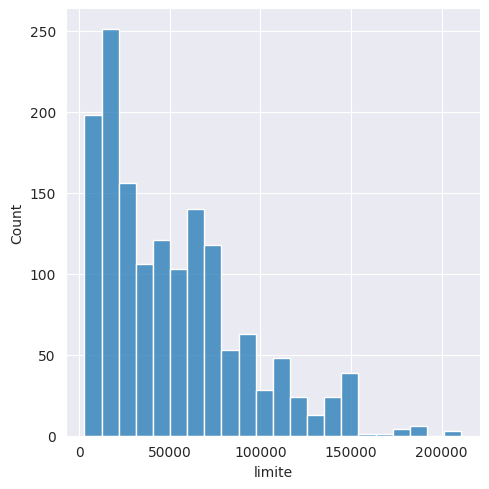

In [100]:
#Creamos un gráfico de distribución
sns.displot(tarjetas['limite'])

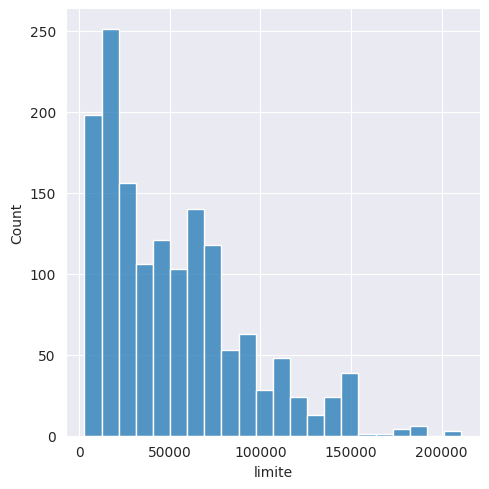

In [101]:
#De esta menera podemos obtener el mismo gráfico
#Colcando un ; al final de cada grafico podemos remover cual quier linea de notificación
sns.displot(data=tarjetas, x='limite');

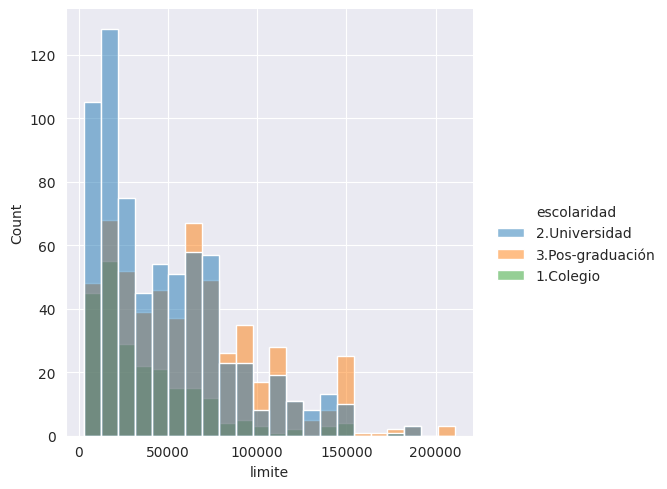

In [102]:
#Dentro de esta función, es posible analizar las variables categóricas
# En el ejemplo vemos si existe alguna diferencia el la variable escolaridad usando la función 'hue()'
sns.displot(data=tarjetas, x='limite', hue='escolaridad');

Se crean 3 gráficos de distribución, unsando una linea de codigo, donde: la variable Colegio esta concentrada en los valores más bajos, al igual que Universidad. Sin embargo, Post-graduación tiene picos mas altos para mayores valores del limite.

# Análisis Gráfico 2

In [103]:
#Creamos una nueva Columna
# 'iu' = Indice de Uso del limite
tarjetas['iu'] = tarjetas['valor_factura']/tarjetas['limite']

In [104]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


Se ha creado la Columna 'iu' que representa el porcentaje de uso del límite disponible de cada persona.

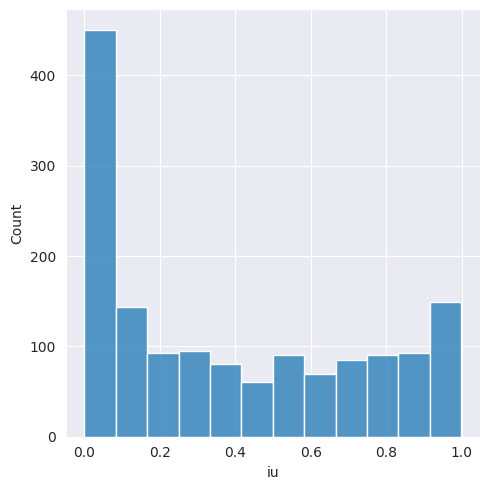

In [105]:
# Graficamos nuevamente para ver la concentración
sns.displot(data=tarjetas, x='iu');

hay un porcentaje bastante alto de personas que no usan mucho el limite disponible en su tarjeta, el cual esta entre el 10%, entre el 20% y el 80% es más esable y apartir del 90% hay un grupo de personas que usan todo su limite.

#Estilos y Colores

In [106]:
#Colocamos fondo cuadricula al gráfico
sns.set_style('whitegrid')

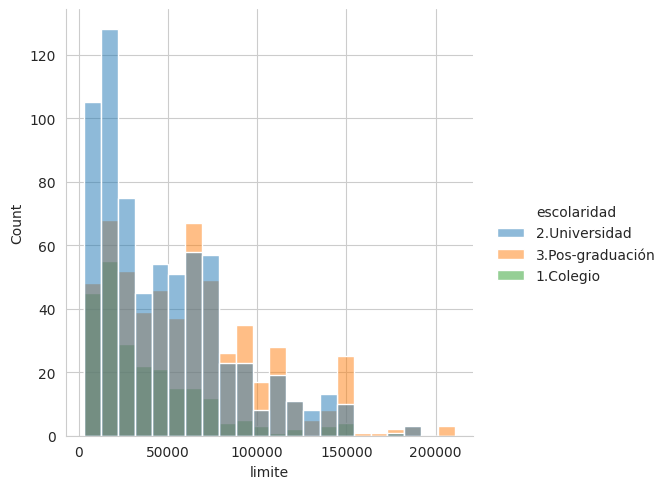

In [107]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad');

In [108]:
#Colocamos fondo cuadricula al gráfico
sns.set_style('darkgrid')

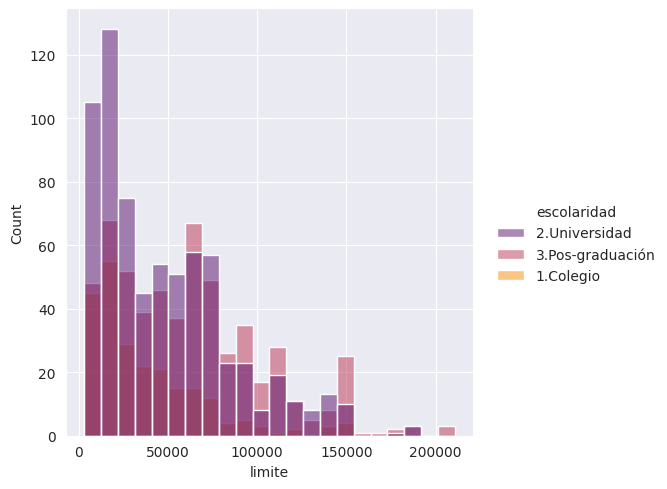

In [109]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad', palette='inferno');

 Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib, pero ofrece una interfaz de alto nivel y una serie de características adicionales para facilitar la creación de gráficos complejos de manera más intuitiva.

**Relación entre Seaborn y Matplotlib:**

- **Matplotli**b es una biblioteca más general y de bajo nivel para la creación de gráficos en Python. Con Matplotlib, puedes crear todo tipo de gráficos, pero puede requerir un poco más de código para personalizarlos y hacerlos visualmente atractivos.

- **Seaborn** utiliza Matplotlib como su base subyacente, pero simplifica muchas de las tareas de creación de gráficos y proporciona estilos visuales mejorados y funciones de alto nivel para crear gráficos complejos con menos esfuerzo. Además, Seaborn tiene una integración más fácil con estructuras de datos como DataFrames de Pandas, lo que lo hace muy popular para análisis de datos.


[Cómo elegir mapas de colores en Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

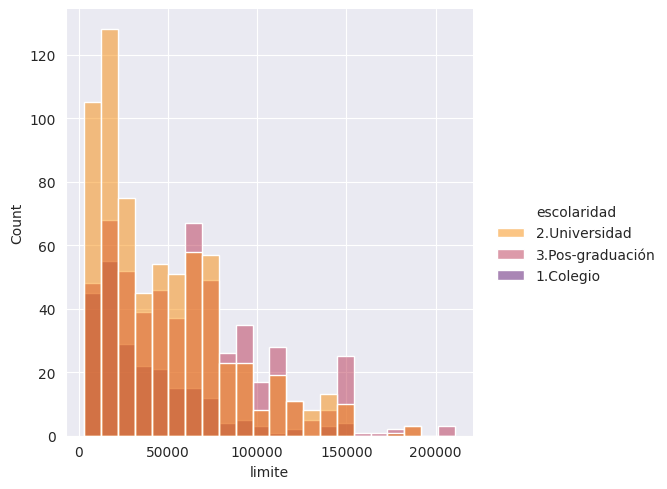

In [110]:
#PAra invertir los colore se puede utilizar una 'r' al final así:'inferno_r'
sns.displot(data=tarjetas, x='limite', hue='escolaridad', palette='inferno_r');

Lo que aprendimos:

- Importamos Seaborn para analizar de forma gráfica las variables que tenemos en nuestra base de datos.
- Construimos una nueva variable numérica en nuestra base de datos.
- Creamos un histograma para analizar variables en nuestra base de datos.
Descubrimos los estilos y colores que Seaborn nos ofrece.

#Análisis de Variables Categóricas

In [111]:
tarjetas.head()
#Recordemos que tenemos 3 variables categoricas: cuenta_corriente, escolaridad y estado_civil

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


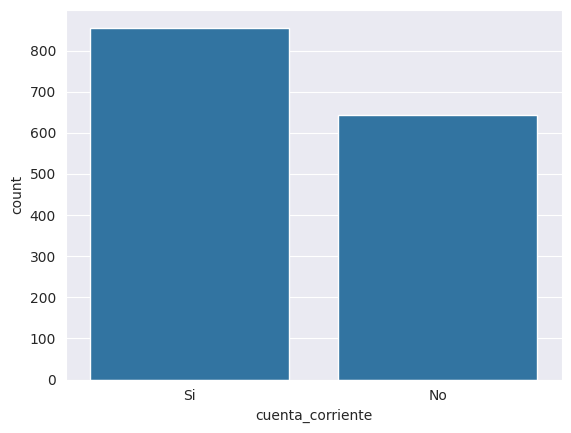

In [112]:
#Observamos si hay más personas que tienen cuenta corriente de las que no tienen
sns.countplot(data=tarjetas, x='cuenta_corriente');

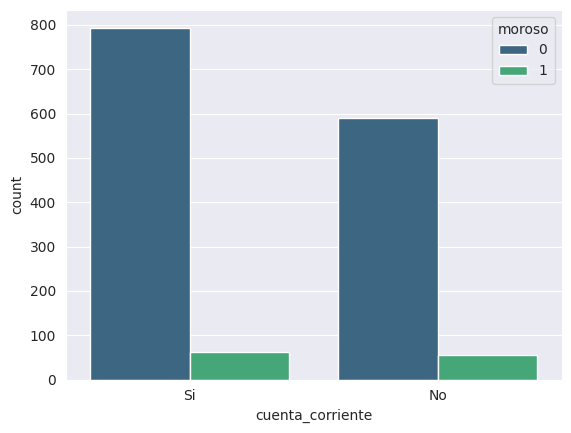

In [113]:
#Incluimos a la variable moroso en nuestro codigo usando la función 'hue()' Donde 1: Es morors y 0: No es mororoso
sns.countplot(data=tarjetas, x='cuenta_corriente', hue='moroso', palette='viridis');

La cantidad de morosos parece ser similar entre las personas que tiene y no tienen cuenta corriente.Sine embargo, en terminos relativos parecen estar más del lado de aquellas personas que no tiene cuenta corriente, ddo que un banco deb tener concoimento de aquellas personas que tienen una cuenta en su organización.

<ipython-input-114-742528358edd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='estado_civil', y='limite', data= tarjetas, palette='magma');


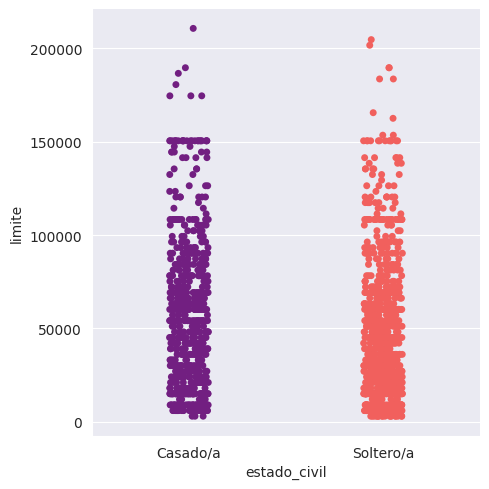

In [114]:
#¿Será que las personas que son casadas tiene más limite en su tarjeta que las personas que son solteras?
sns.catplot(x='estado_civil', y='limite', data= tarjetas, palette='magma');

La distribución es muy similiar entre casados y solteros, no se encuentra una diferencia significativa

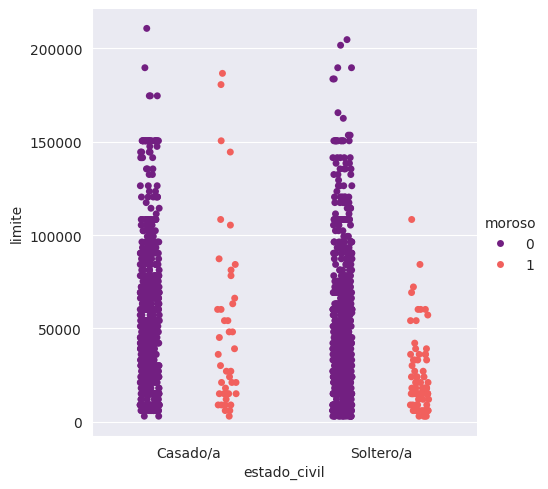

In [115]:
#Incluimos a la variable moroso y separamos los gráficos con 'dodge=True'
sns.catplot(x='estado_civil', y='limite', data= tarjetas, palette='magma', hue='moroso', dodge=True);

De acuerdo con los resultados encontrados, las personas morosas tienen más limites cuando son casadas que cuando son solteras.

<ipython-input-116-6249df950cc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/s

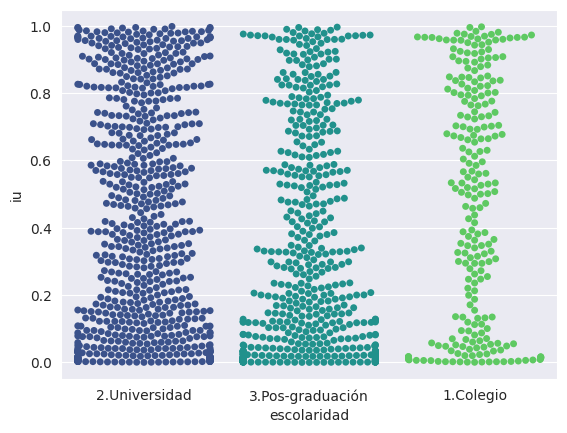

In [116]:
#¿Será que el nivel de escolaridad influye en el porcentaje de gasto del limite?
sns.swarmplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');

Segun este gráfico, existe la posibilidad de que los puntos de una columna se crucen con los puntos de otra columna.Por esta razón, nos aparece que un porcentaje de nuestros datos no se pudo mostrar. los puntos que se muestran son los que no se sobreponen.

- Las personas de escloradidad Colegio tienen dos picos uno muy cercano a 0 y otro a 1.
- La variable Universidad esta un poco más distribuida al igual que Pos-graduación.

Para mejora la visulización de esta información utilizamos otro gráfico que nos permita ver el 100% de los datos.

## Boxplot y Violinplot

<ipython-input-117-095d2afe6a78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');


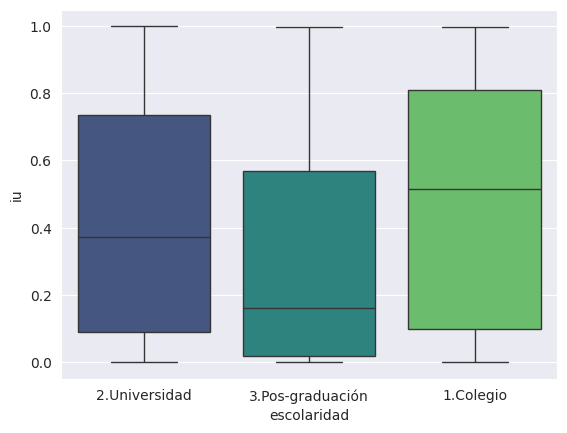

In [117]:
sns.boxplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');

- Las personas con un nivel de escolaridad de colegio tienen un 'iu' más alto cercano al 60%.
- Las personas con un nivel de escolaridad de Universidad tienen un 'iu'  cercano al 40%.
- Las personas con un nivel de escolaridad de Post-graduación tienen un 'iu'  cercano al 20%.

Los resultados indican que a medida que aumenta el nivel de escolaridad, el indice de uso 'iu' disminuye. Esto pude ser porque pueden tener un límite más alto.

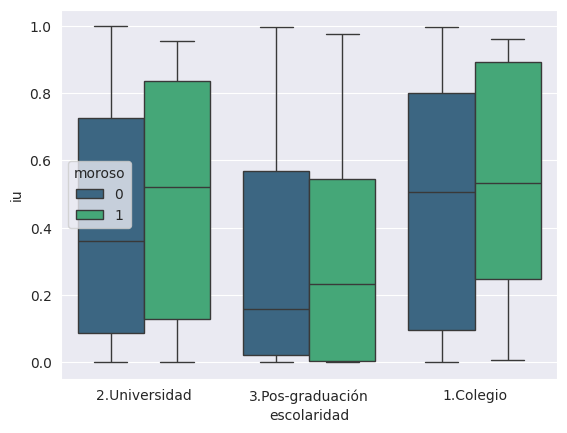

In [118]:
# Hacemos el análisis incluyendo a la variable moroso
sns.boxplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis', hue='moroso');

En cada grupo la media de las personas que son morosa es más alta de quienes no lo son. Las personas morosas tienden a usar más su limite de la tarjeta de crédito.

<ipython-input-119-5419a560365e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');


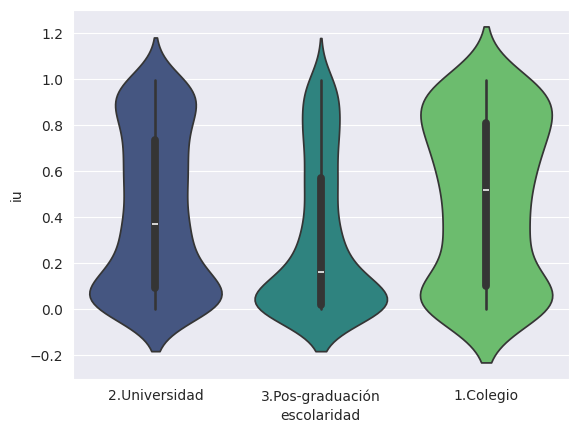

In [119]:
#Ahora usamos la misma información usando el Violinplot
sns.violinplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis');

De igual manera que en el BoxPlot, la concentración esta más en los valores bajos, cercana a cero. El punto Blanco representa la media.

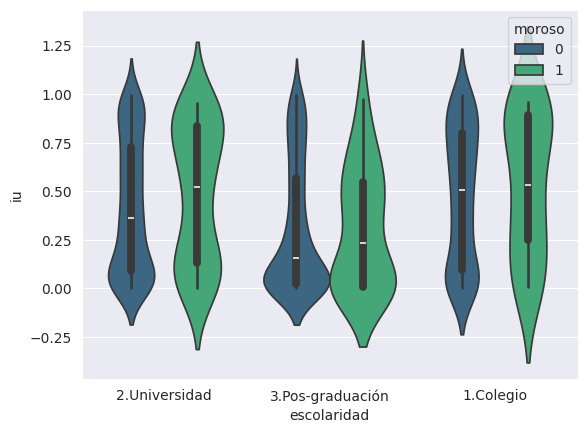

In [120]:
# Hacemos el análisis incluyendo a la variable moroso
sns.violinplot(x= 'escolaridad', y='iu', data=tarjetas, palette='viridis', hue='moroso');

Los resultados son los mismos que en el gráfico BoxPlot

#¿Será que las personas de más edad tienen un límite disponible más alto?

In [121]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


In [122]:
#Observamos las edades
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72])

No es recomendable analizar cada edad individualmente en un gráfico, ya que se generarían demasiadas columnas y los valores se distribuirían de manera demasiado dispersa y pequeña. Por esta razón, es preferible dividir la serie en rangos de edad para facilitar el análisis.

In [123]:
#Creamos los Rangos
bins=[20, 30, 40, 50, 100]#división de datos en intervalos.
nombres=['20-30', '30-40', '40-50', '50+']

tarjetas['rango_edad']= pd.cut(tarjetas['edad'], bins, labels=nombres)

In [124]:
#Observamos la variable edad acorde a su respectivo rango
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


<ipython-input-125-bec8f9f7ecf5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rango_edad', y='limite', data=tarjetas, palette='viridis');


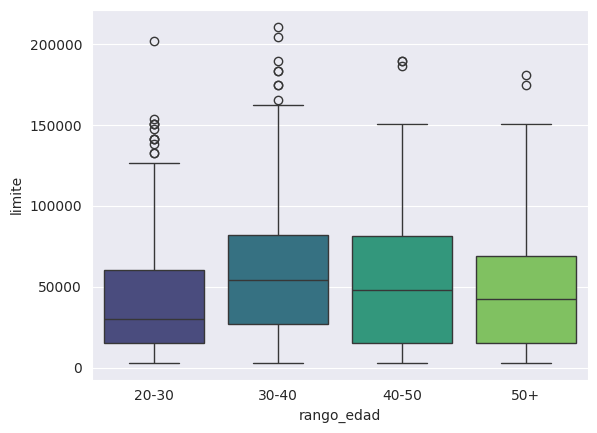

In [125]:
sns.boxplot(x='rango_edad', y='limite', data=tarjetas, palette='viridis');

Los resultados indican que las personas que tienen más limite son las personas que estan en el rang de edad de 30-40 años y las personas que tienen un menor limite son las personas que estan en un rango de edad de 20-30 años ya que son personas que apenas estan empezando su vida financiera y no tienen mucha experiencia de credito. Despues siguen las personas de 40-50 seguidas de las personas de mas de 50 años.  Por tanto, las personas de más edad tienen un límite disponible más alto son las que estan en el rango de 30-40 años.

<ipython-input-126-585f608e6ed8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='rango_edad', y='limite', data=tarjetas, palette='viridis');


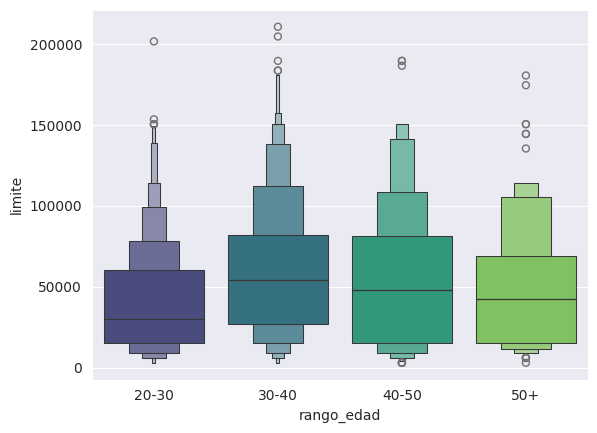

In [126]:
sns.boxenplot(x='rango_edad', y='limite', data=tarjetas, palette='viridis');

Un boxenplot en Python es una variación más avanzada del boxplot (diagrama de caja), que se utiliza para mostrar la distribución de un conjunto de datos. El boxenplot, disponible en la biblioteca Seaborn, es particularmente útil para datos que contienen muchos valores atípicos o distribuciones sesgadas, ya que proporciona una representación más detallada de las colas de la distribución.

Lo que aprendimos:

- Aprendimos a crear diferentes gráficos que nos ayudan a analizar variables categóricas: countplot, catplot, swarmplot.
- Aprendimos a usar el parámetro hue, que nos sirve para fraccionar una variable en nuestro gráfico.
- Introducimos los gráficos boxplot y violinplot.
- Creamos y analizamos con boxplot la variable categórica rango_edad.

#Análisis de Variables Númericas

In [127]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


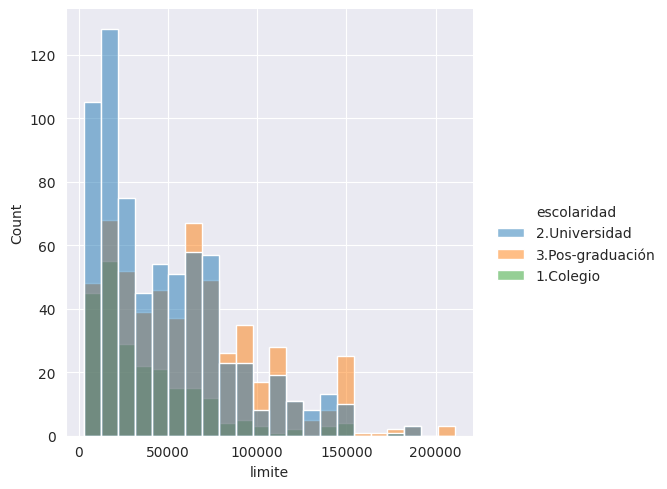

In [128]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad');

Existe una forma de separar cada una de las 3 curvas que se graficaron anteriormente, para esto se utiliza la función **'col()'**
De esta manera se obtiene una mejor visualización del limite para cada una de las escolaridades.

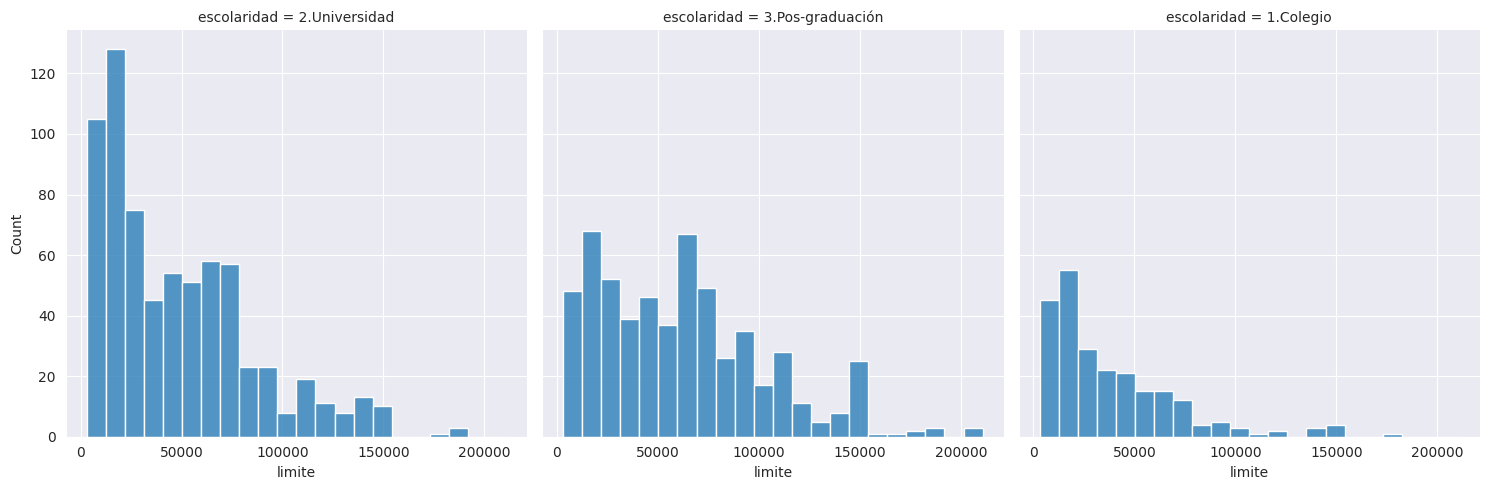

In [129]:
sns.displot(data=tarjetas, x='limite', col='escolaridad');

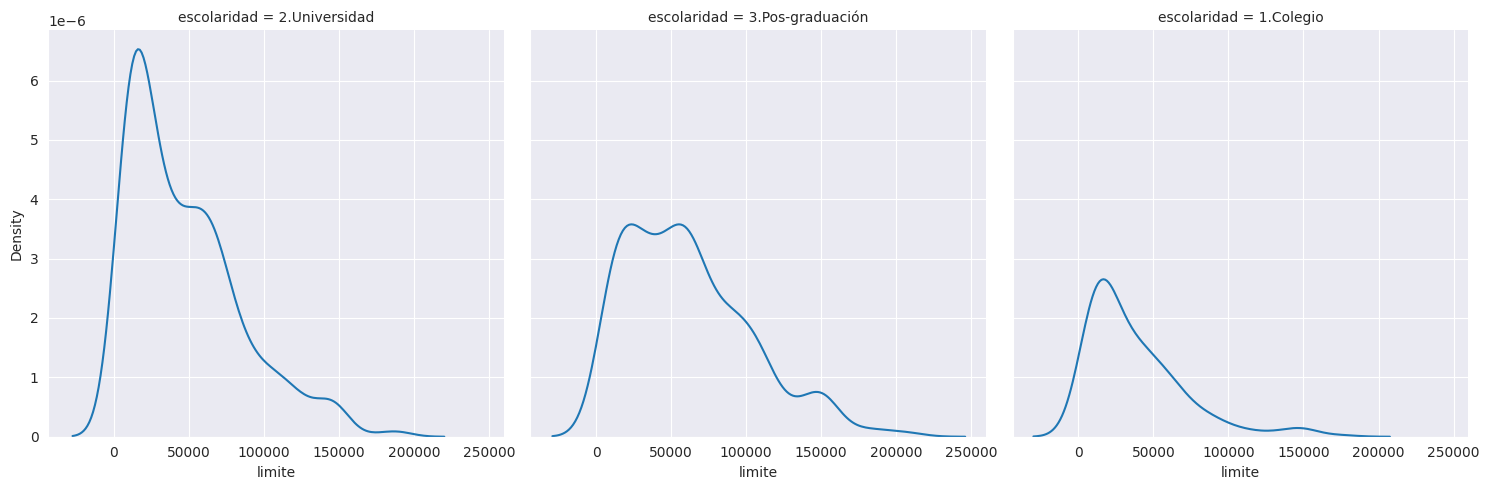

In [130]:
#Podemos ver el mismo grafico con la función de densidad kind='kde'
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind= 'kde');

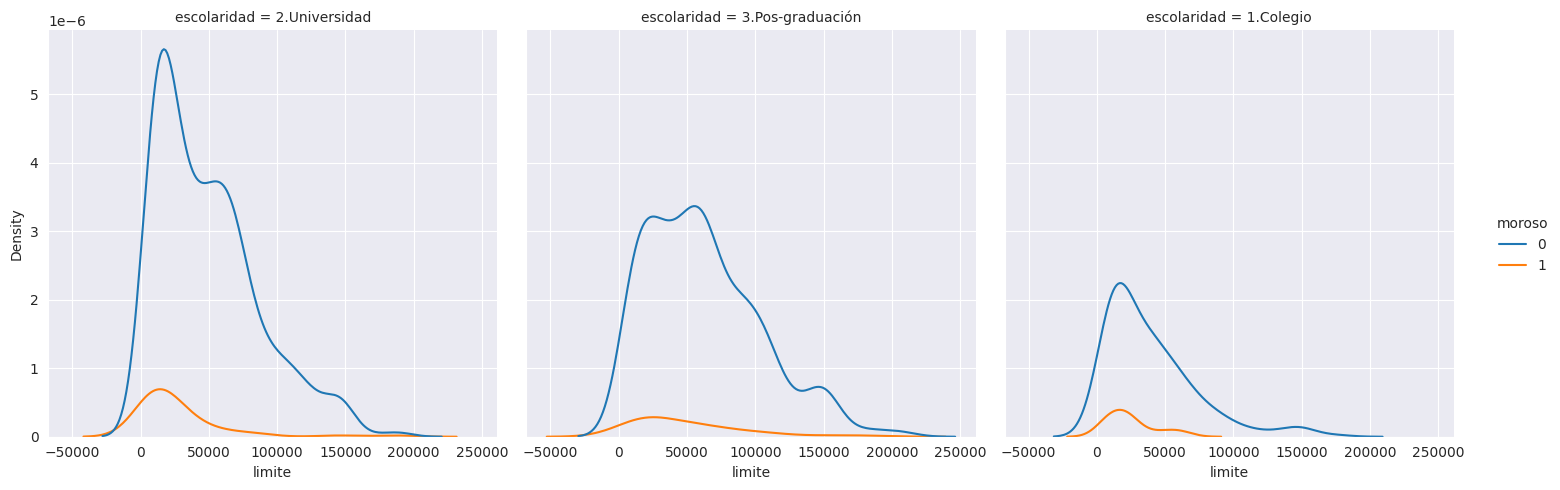

In [131]:
#Podemos ver como se distribuye al incluir la variable 'moroso'
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind= 'kde', hue='moroso');

En la escolaridad Pos-graduación, la morosidad es mas plana, los picos más altos estan en Universidad y Colegio, Siendo Universidad el más alto.

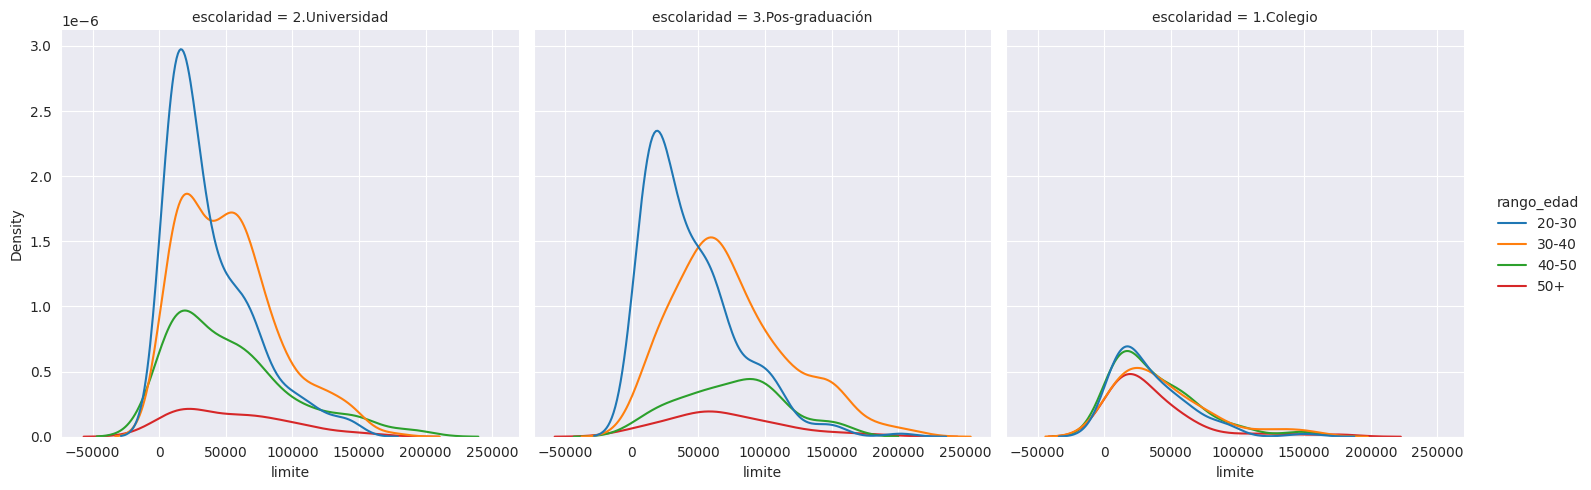

In [132]:
#Podemos ver como se distribuye al incluir la variable 'rango_edad'
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind= 'kde', hue='rango_edad');

- Es posible, al utilizar displot() podemos usar el parámetro hue para mostrar diferentes distribuciones en un mismo gráfico.
- Es posible, al utilizar displot() podemos usar el parámetro col para abrir diferentes gráficos, uno para cada campo en nuestra variable.

#Análisis de Variables Númericas y Regresión
##Gráfico de Dispersión

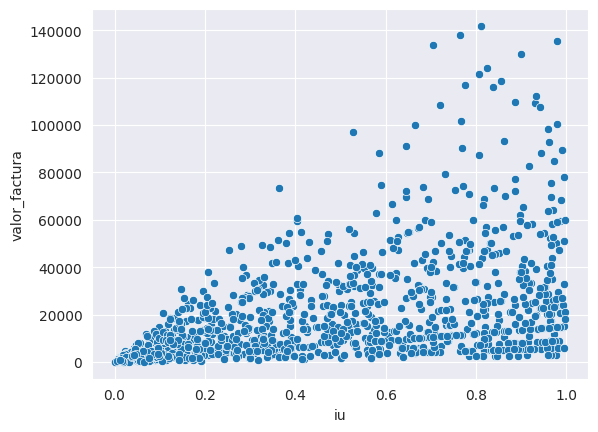

In [133]:
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas);

La relación se muestra en forma directa, en la medida que aumenta el valor de la factura aumenta tambien el indice de uso 'iu'

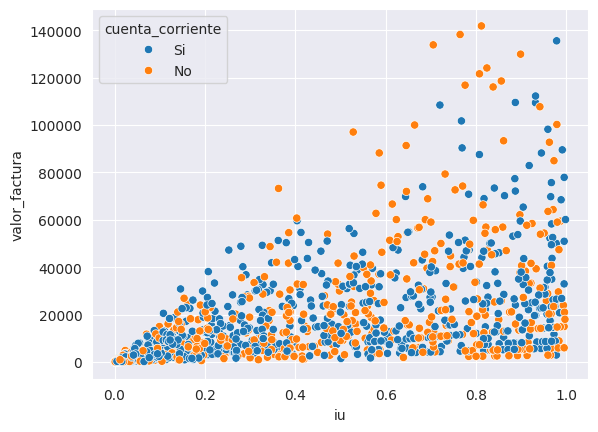

In [134]:
#Se incluye la varible cuenta_corriente
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente');

Se diferencia la información teniendo en cuenta que los puntos naranjas son para quienes No tienen cueta corriente y los puntos azules para quienes si la tienen. Se observa que quienes no tienen cuenta corriente tienen un 'iu' mucho más alto.

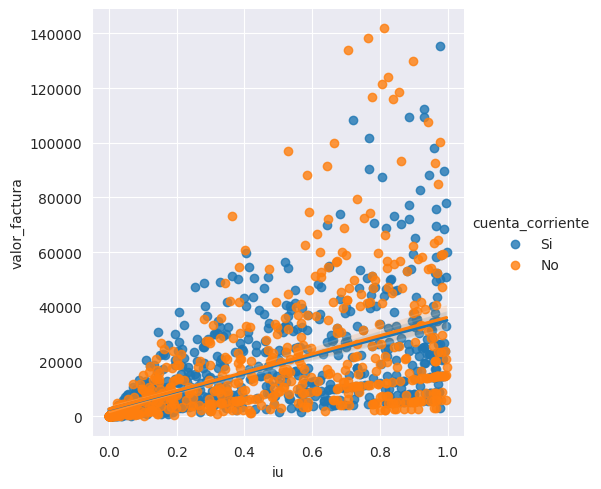

In [135]:
# Se traza una línea de tendencia utilizando la función lmplot()
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente'); #lm se refiere a lineal model

## Test de Hipótesis

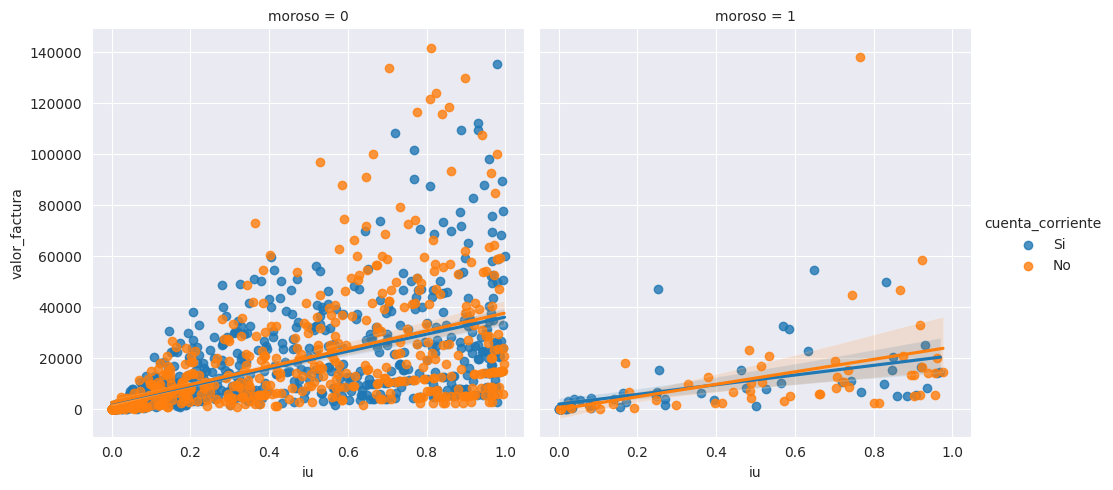

In [136]:
# Podemos compara con otras variables para aplicar el Test de Hipótesis, separando el grafico con la función col()
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente', col='moroso');

Se obtiene una variable de regresión para cada unico de los 2 grupos que tenemos en la variable moroso.
- 0 = No moroso
- 1 = moroso

La línea de regresión es positiva pero su inclinación es diferente. Por tanto, evauaremos si esa diferencia es estadisticamente significativa.

In [137]:
from scipy.stats import ranksums

H<sup>null<sup>

La distribución de los grupos moroso y No moroso es la misma

H<sup>alt<sup>

La distribución de los grupos moroso y No moroso No es la misma

In [140]:
moroso= tarjetas.query('moroso == 1').valor_factura
moroso # Valor de factura de las personas morosas

,valor_factura
0,934.0122
1,519.3975
38,10891.0881
45,330.6078
47,7316.7300
...,...
1448,1619.0147
1472,17048.2820
1475,4402.0820
1478,1851.1628


In [142]:
no_moroso= tarjetas.query('moroso == 0').valor_factura
no_moroso # Valor de factura de las personas No morosas

,valor_factura
2,4223.5297
3,14522.9563
4,124060.1253
5,114.4180
6,4244.3056
...,...
1494,32698.2556
1496,23637.8555
1497,962.9178
1498,864.7592


In [143]:
#Análizamos la distribución de estos 2 grupos
ranksums(moroso, no_moroso)

RanksumsResult(statistic=-2.562530598426702, pvalue=0.010391243081223555)

Los resultados indican que, como  pvalue=0.01 Entonces: 0.01 < 0.05 aceptamos la Hipotesis Alternativa "La distribución de los grupos moroso y No moroso No es la misma".


In [144]:
resultado =ranksums(moroso, no_moroso)

In [145]:
print('El P_value de nuestro test es {}'.format(resultado.pvalue))

El P_value de nuestro test es 0.010391243081223555


La distribución del valor de factura entre los grupos moroso y no moroso no es igual, por lo que podemos aceptar la hipótesis alternativa. Dado que nuestro p-value es menor a 0.05 podemos entender que nuestro resultado es estadísticamente significativo y podemos aceptar la hipótesis alternativa.

Lo que aprendimos:

- Hicimos un análisis más profundo de los gráficos de distribución (histograma) usando displot.
- Creamos gráficos diferentes, categorizando nuestra información con el parámetro col.
- Hicimos una introducción al gráfico de dispersión (scatterplot) y al gráfico de modelo linear (lmplot).
- Realizamos un test de hipótesis, para intentar determinar si la diferencia entre los grupos morosos y no morosos es estadísticamente significativa.

#Análisis Conjunta de Variables

## Jointplot

El jointplot de Seaborn es una herramienta de visualización utilizada para explorar la relación entre dos variables numéricas y al mismo tiempo mostrar las distribuciones marginales de ambas variables. Es útil cuando deseas observar tanto la correlación o dependencia entre las dos variables, como las distribuciones individuales de cada una de ellas.

In [147]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30


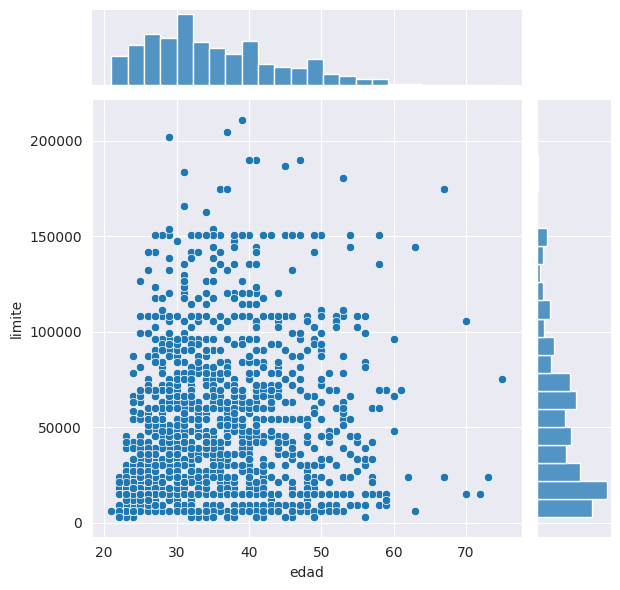

In [148]:
#Relacionamos las variables númericas edad y limite
sns.jointplot(x='edad', y='limite', data=tarjetas);

El gráfico muestra la dispersión entre las variables edad y limite. tambien muestra el Histográma. La dispersión grande de datos indica que no hay una correlación muy alta, pero su relación es directa y positiva.

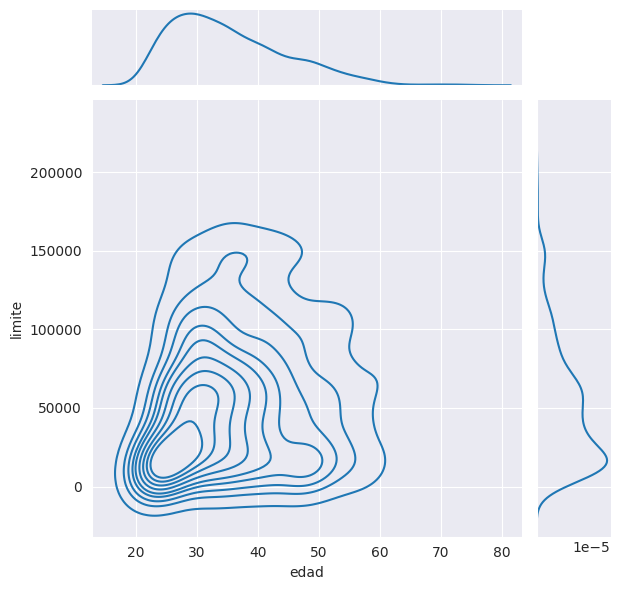

In [149]:
#Podemos ver el mismo grafico con la función de densidad kind='kde'
sns.jointplot(x='edad', y='limite', data=tarjetas, kind = 'kde');

Este grafico de Densidad muestra los mismos resultados que el anterior Gráfico de dispersión, cuando la lineas estan mas juntas la concentración es mayor.

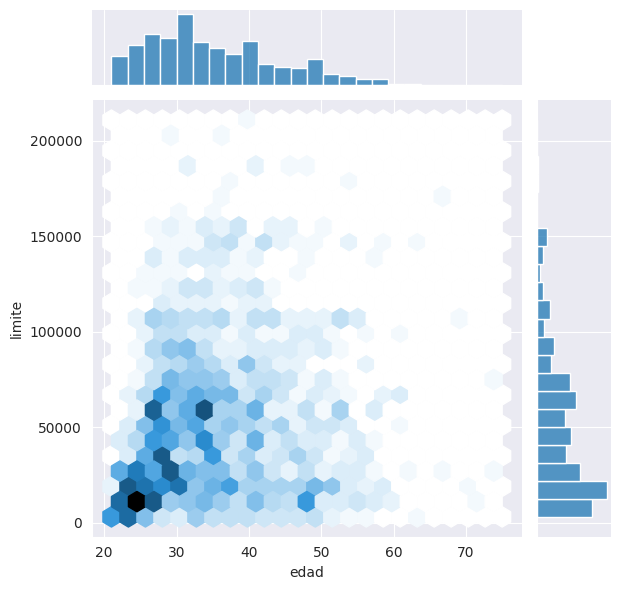

In [150]:
#Podemos ver el mismo grafico con la función de densidad kind='hex'
sns.jointplot(x='edad', y='limite', data=tarjetas, kind = 'hex');

 La función kind='hex indica a Seaborn que debe utilizar un gráfico de tipo hexbin para mostrar la relación entre las variables edad y limite. Donde los puntos más oscuros indica la mayor concentración de datos.

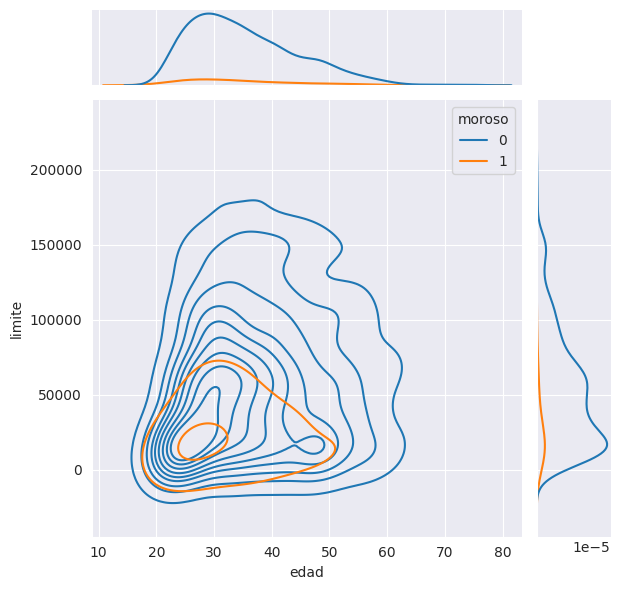

In [151]:
#Podemos incluir la variable morosidad
sns.jointplot(x='edad', y='limite', data=tarjetas, kind = 'kde', hue='moroso');

## Pairplot

El pairplot de Seaborn es una herramienta de visualización extremadamente útil para explorar la relación entre múltiples variables numéricas en un conjunto de datos. Este gráfico genera una matriz de gráficos de dispersión (scatter plots) para todas las combinaciones posibles de las variables numéricas, mostrando cómo se relacionan entre sí. Además, en los márgenes de la diagonal, puedes ver distribuciones univariantes (como histogramas o KDE) de cada variable.

In [152]:
tarjetas.describe()# EStadisticos Descriptivos

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


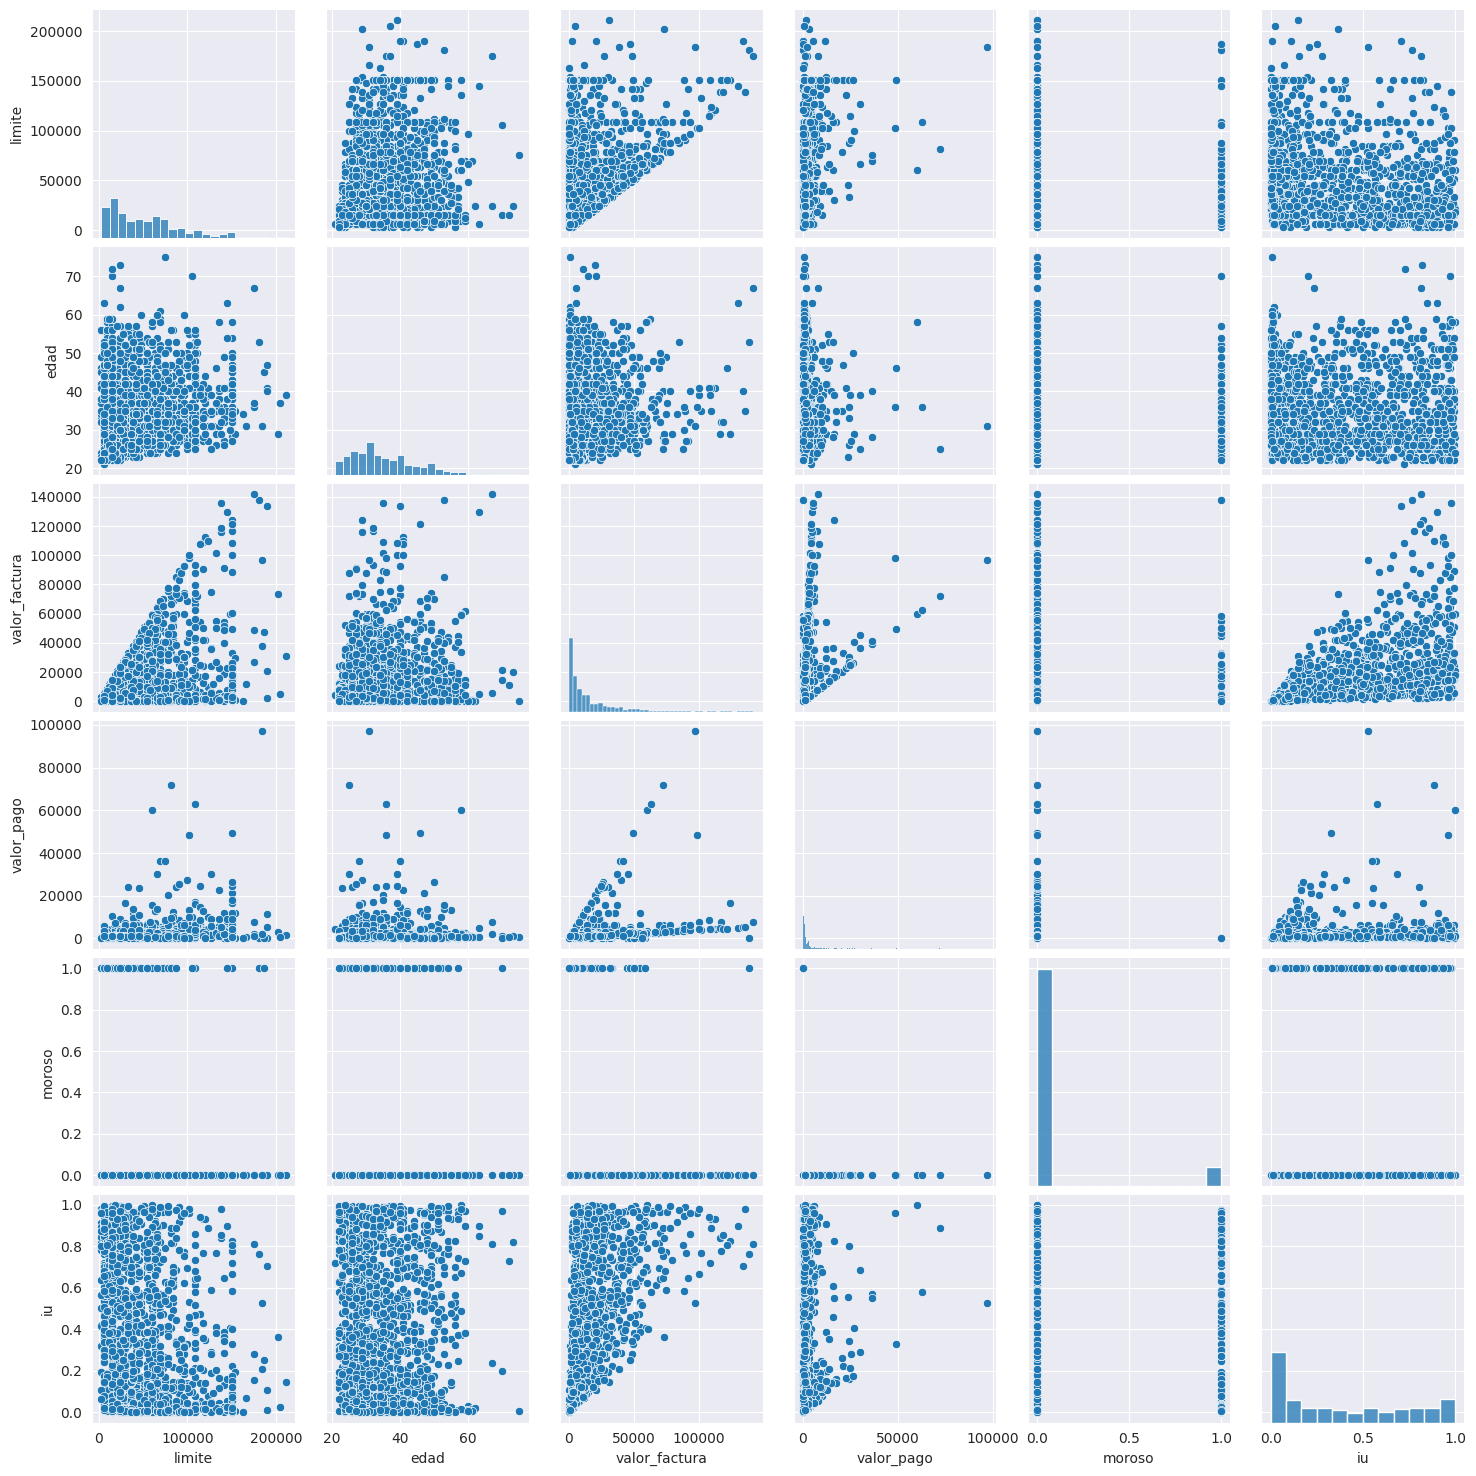

In [153]:
sns.pairplot(data=tarjetas);

Este gráfico muestra un analisis rapido de como se relacionan las variables entre si. Donde cada una de las filas representa a cada variable. En la líneal diagonal se tiene el histográma que es cuando la variable se relaciona con sigo misma.

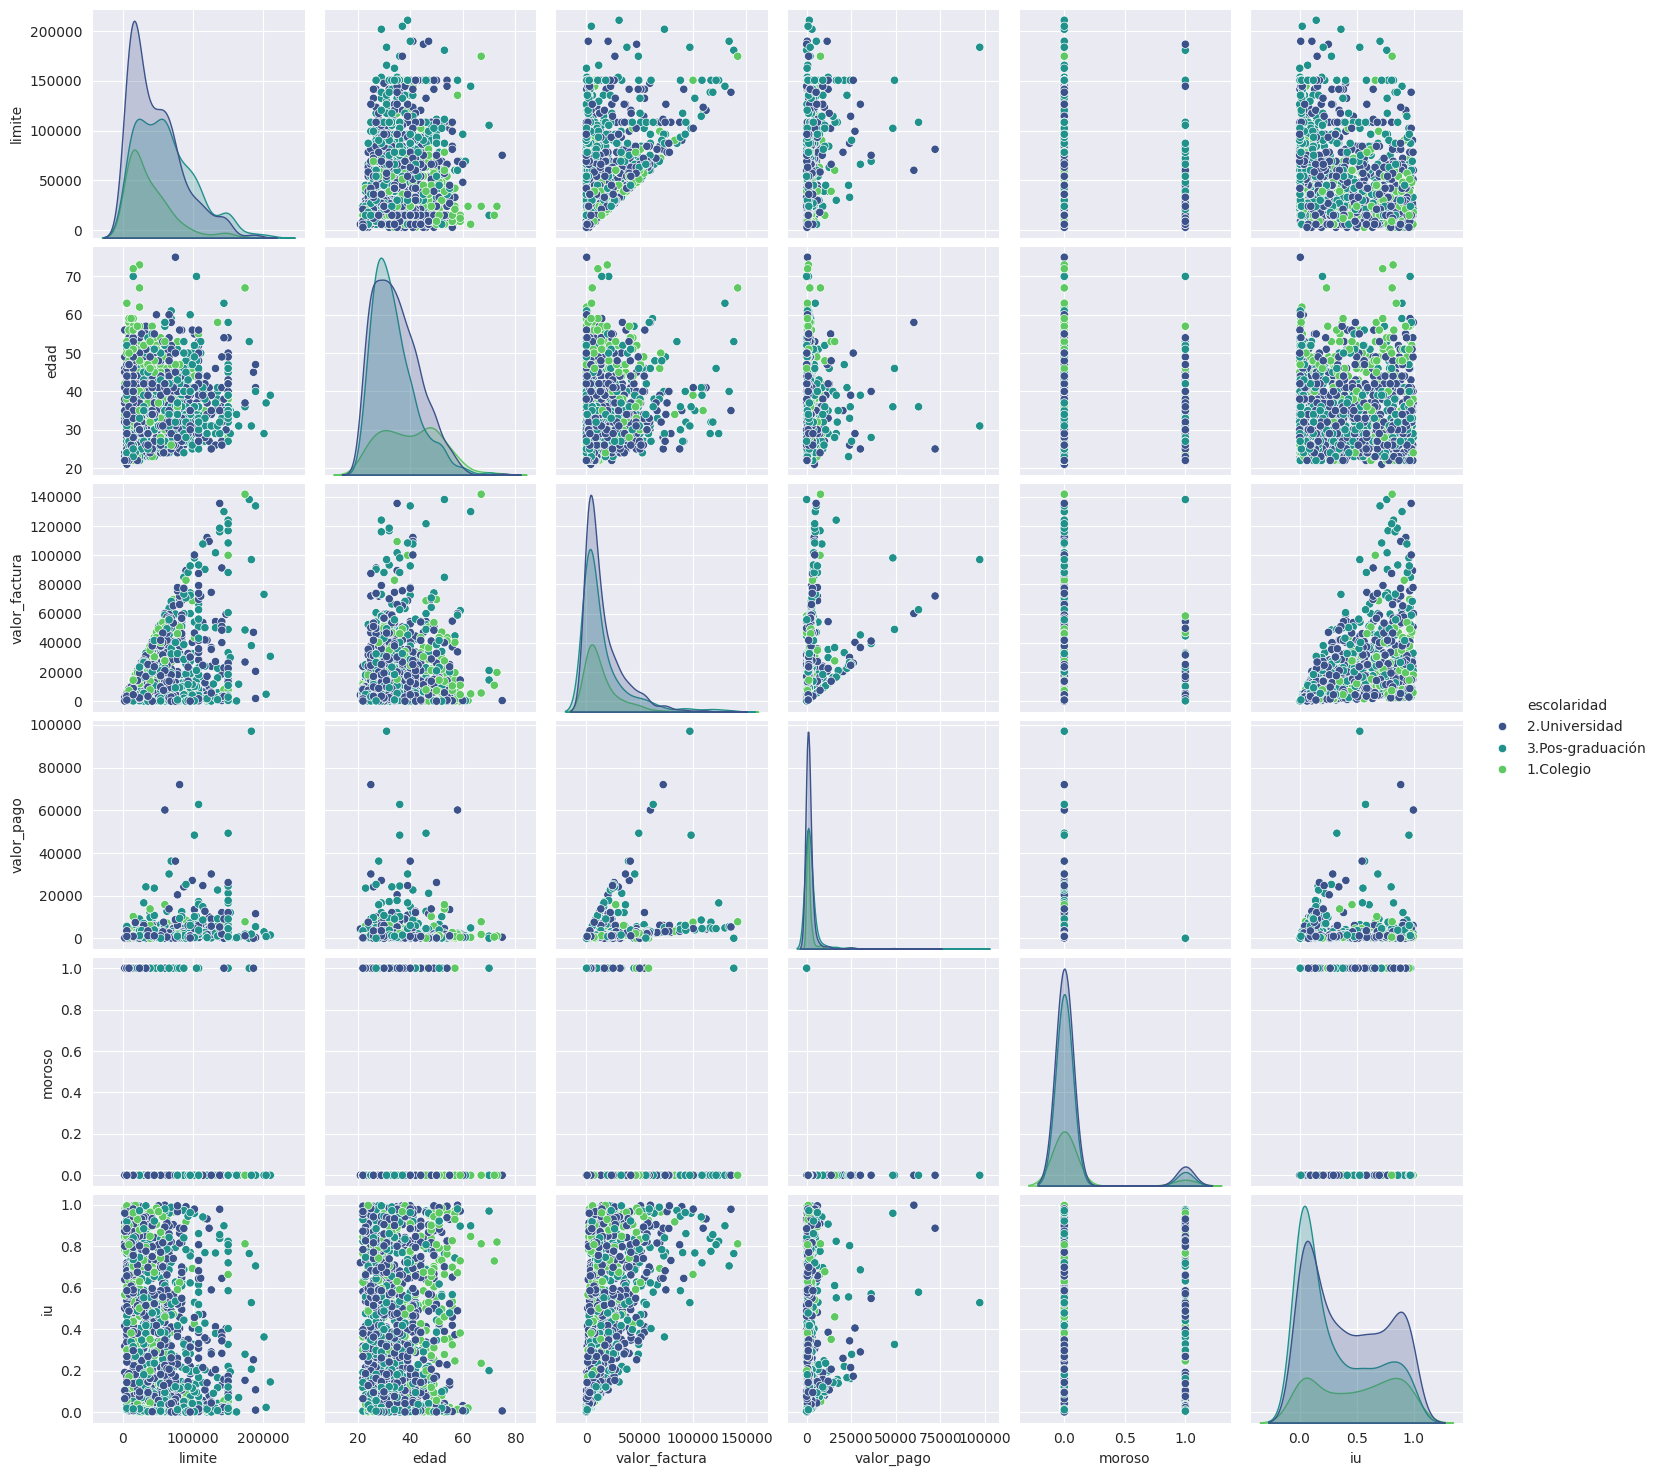

In [154]:
#Algo positivo de pairplot() es que podemos analizar más variables
sns.pairplot(data=tarjetas, hue ='escolaridad', palette='viridis');

El gráfico muestra la relación del total de variables devididas por los niveles de escolaridad

Lo que aprendimos:

- Introducimos el gráfico jointplot con sus opciones: scatter, kde, hex. Esto para analizar la variable de edad y limite.
- Hicimos un análisis descriptivo de las variables en nuestra base de datos.
- Usamos el gráfico pairplot para hacer un análisis conjunto de todas nuestras variables numéricas en la base de datos.